In [1]:
# importing requirements
from __future__ import print_function
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from matplotlib import pyplot
from scipy.misc import toimage
%matplotlib inline

Using Theano backend.
Using gpu device 0: Quadro M6000 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN not available)


In [5]:
# keras is having some in built mechanism to download test data and load it
# load data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [41]:
# lets print data size of all four section
print ("X_train Size: ", len(X_train)," y_train Size :" ,len(y_train)," X_test Size : ",len(X_test)," y_testSize : ",len(y_test))

X_train Size:  50000  y_train Size : 50000  X_test Size :  10000  y_testSize :  10000


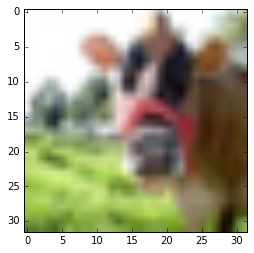

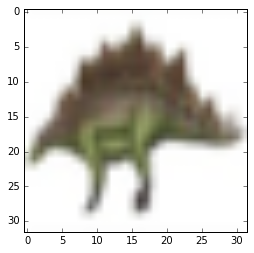

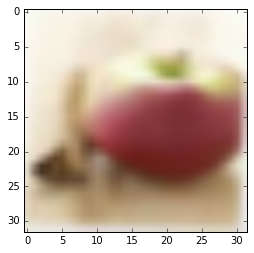

In [14]:
pyplot.imshow(toimage(X_train[0])) #showing first image
pyplot.show()
pyplot.imshow(toimage(X_train[1])) #showing second image
pyplot.show()
pyplot.imshow(toimage(X_train[2])) #showing third image
pyplot.show()

In [15]:
batch_size = 500 # take only this many samples in gpu
nb_classes = 100 # number of output classes
nb_epoch = 25 # run for 25 epoches
data_augmentation = True 

In [25]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [18]:
Y_test[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [19]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32, 32, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 30, 30, 32)    9248        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 30, 30, 32)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 49s - loss: 7.0231 - acc: 0.0112 - val_loss: 4.5859 - val_acc: 0.0209
Epoch 2/25
50000/50000 [==============================] - 49s - loss: 4.5330 - acc: 0.0230 - val_loss: 4.4896 - val_acc: 0.0343
Epoch 3/25
50000/50000 [==============================] - 49s - loss: 4.4621 - acc: 0.0320 - val_loss: 4.4044 - val_acc: 0.0551
Epoch 4/25
50000/50000 [==============================] - 49s - loss: 4.3738 - acc: 0.0479 - val_loss: 4.2837 - val_acc: 0.0786
Epoch 5/25
50000/50000 [==============================] - 50s - loss: 4.2673 - acc: 0.0659 - val_loss: 4.1325 - val_acc: 0.0962
Epoch 6/25
50000/50000 [==============================] - 49s - loss: 4.1399 - acc: 0.0818 - val_loss: 4.0388 - val_acc: 0.1147
Epoch 7/25
50000/50000 [==============================] - 50s - loss: 4.0048 - acc: 0.0983 - val_loss: 3.7763 - val_acc: 0.1454
Epoch 8/25
50000/50000 [==============================

In [23]:
# saving the model
model.save_weights("cifar_trained_for_tutorial.h5")

In [42]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 2.57119269905
Test accuracy: 0.3596


In [32]:
# finally lets predict on the test dataset using previously built model
score = (model.predict_classes(X_test, batch_size=32, verbose=1))

10000/10000 [==============================] - 2s     


In [35]:
# printing classes and lenght 
print (score), len(score)

[49 33 24 ..., 33 42 70]


(None, 10000)

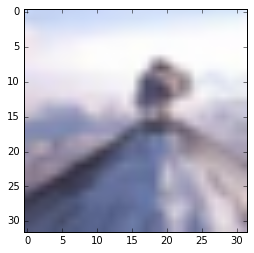

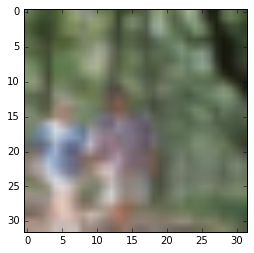

In [39]:
# lets see whats there in first few images
pyplot.imshow(toimage(X_test[0])) #showing first image
pyplot.show()
pyplot.imshow(toimage(X_test[1])) #showing first image
pyplot.show()